In [1]:
import pandas as pd
import numpy as np
from doc_bd import Manage_db
import json
import os
import mysql.connector
from mysql.connector import errorcode
import re
import urllib3 
import time
import warnings
warnings.filterwarnings('ignore')
urllib3.disable_warnings()
import matplotlib.pyplot as plt
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree

In [2]:
sql = Manage_db(database = 'lop2test', host = 'localhost', user='root', password='')

client = MongoClient("localhost", 27017)
db = client['lop2test']
submissions_lop = db['submissions']

#df_class.loc[df['id_class'] == 'f2dd7bef-5b5d-4cb3-9efa-aa8652af0605']
id_class = 'e378c59f-e815-4a41-95fc-e95e4432a34c'
#pd_data = pd.DataFrame([id_class], columns = ['id_class'])
condition = "WHERE class_id = 'e378c59f-e815-4a41-95fc-e95e4432a34c'"
df_submission = sql.search(table='submission')
list_quest_subm = df_submission.drop(['ip', 'id', 'environment','hitPercentage','timeConsuming','createdAt','type','language', 'answer', 'char_change_number', 'user_id', 'lesson_id', 'class_id', 'test_id'], axis=1).drop_duplicates()
df_submission_class = sql.search(table='submission', condition=condition)
df_lop_lists = sql.search(table='listQuestions')

df_lop_tests = sql.search(table='test')

df_class = sql.search(table='class')
df_quest = sql.search(table='question')

users_class = sql.search(table='classHasUser')
tag = sql.search(table='tag')
quest_tag = sql.search(table='questionHasTag')
df_list_q = sql.search(table='listHasQuestion')

In [3]:
tag.columns.values[0] ='tag_id'
list_class = df_submission_class['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_class = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_class = df_list_class.append(b, ignore_index=True)
df_list_class.columns.values[0] = 'listQuestions_id'

test_class = df_submission_class['test_id'].drop_duplicates().reset_index(name='id')
a = df_lop_tests.columns.tolist()
df_test_class = pd.DataFrame(columns = a)

for i in range(test_class.count().values[0]):
    for a in range(df_lop_tests.count().values[0]):
        if test_class['id'][i] == df_lop_tests['id'][a]:
            b = dict(df_lop_tests.loc[a])
            df_test_class = df_test_class.append(b, ignore_index=True)
df_test_class.columns.values[0] = 'test_id'

quest_class = df_submission_class['question_id'].drop_duplicates().reset_index(name='id')
a = df_quest.columns.tolist()
df_quest_class = pd.DataFrame(columns = a)

for i in range(quest_class.count().values[0]):
    for a in range(df_quest.count().values[0]):
        if quest_class['id'][i] == df_quest['id'][a]:
            b = dict(df_quest.loc[a])
            df_quest_class = df_quest_class.append(b, ignore_index=True)
df_quest_class.columns.values[0] = 'question_id'

#verificando o total de questoes cadastrados em listas da turma 
list_name = df_list_class['listQuestions_id'].tolist()
a = df_list_q.columns.tolist()
df_q_l = pd.DataFrame(columns = a)

for i in range(df_list_class.count().values[0]):
    for a in range(df_list_q.count().values[0]):
        if df_list_class['listQuestions_id'][i] == df_list_q['list_id'][a]:
            b = dict(df_list_q.loc[a])
            df_q_l = df_q_l.append(b, ignore_index=True)

subs =[]
for x in submissions_lop.find():
    subs.append(x)
df_class_lop = pd.DataFrame(subs)

In [4]:
list_class = df_class_lop['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_lop = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_lop = df_list_lop.append(b, ignore_index=True)
df_list_lop.columns.values[0] = 'listQuestions_id'
df_list_lop

,listQuestions_id,title,code,createdAt,updatedAt,author_id
0,9338cc7b-7cf4-4d9f-af63-25a7effa7189,(Lop) Estruturas de decisão - Múltiplas decisões,358922cf78,2020-03-23 16:07:21,2020-09-15 00:03:03,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
1,dd1cd083-6c00-4605-9ff1-163bd4069363,Repetição condicional - Lista Resolvida (LOP),f00e8a3272,2020-06-24 11:44:44,2020-06-24 13:30:49,2985b749-e081-400c-b2cc-97ae042a777d
2,aca84206-87b2-4478-afa4-6193119cc06a,Repetição condicional - Lista de Exercícios (LOP),0814ea8f94,2020-06-29 12:19:48,2020-06-29 12:19:48,2985b749-e081-400c-b2cc-97ae042a777d
3,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,Laboratório 01 - Expressões Aritméticas,d0947edaac,2020-02-28 14:49:23,2020-02-28 14:49:23,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
4,813dedaa-0989-489b-9804-3850ae4b83d1,Repetição contada - Lista Prática (LOP),73a86e8081,2020-07-07 11:56:51,2020-07-07 11:56:51,02673ba8-1fcb-4cb0-9cf3-a789cab48731
5,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,Repetição contada - Lista de Exercícios (LOP),7a2e23fcb3,2020-07-07 11:59:39,2020-07-07 11:59:39,02673ba8-1fcb-4cb0-9cf3-a789cab48731
6,5ebe517f-50f2-4629-a22f-1dea895fce25,Aula - Funções Aritméticas,4749406f21,2020-03-04 21:55:18,2020-03-04 21:55:18,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
7,1551e3ed-c875-4bb3-8e4e-58407df40776,Vetores - Lista de Exercícios (LOP),309289819d,2020-07-16 17:37:42,2020-07-16 17:37:42,6a36fa60-665f-4d15-a9de-0a523b93ca71
8,cf509a46-6a97-440e-a5c0-f7ba7537ef96,(Lop) Estruturas de decisão - problemas sobre ...,5c2cb0df7d,2020-04-08 01:15:40,2020-04-08 01:15:40,None
9,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,Treinamento - Expressões Aritméticas,87add2f05c,2020-03-06 16:09:41,2020-03-06 16:09:41,1a3aa181-9fc6-41e1-b61a-febd18f4eb23


In [5]:
#aprovados - acima da media
#submissoes da turma

#retirando da df_class_lop todas as turmas do 2020.1
l_classes = df_class_lop['class_id'].drop_duplicates().tolist()
nclasses = []
nclasses.append(l_classes[0])
nclasses.append(l_classes[5])
nclasses.append(l_classes[8])

df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[0]].index )
df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[1]].index )
df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[2]].index )

df_performance = df_class_lop.groupby(['class_id', 'user_id', 'listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
#soma das notas por lista
df_performance = df_performance.groupby(['class_id', 'user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
#Me traz as porcentagens maximas de acerto por questão
df_performance = df_class_lop.groupby(['class_id', 'user_id','listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
      #Soma as porcentagens de uma lista/prova unica
df_performance = df_performance.groupby(['class_id', 'user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
      #Renomeando para melhorar entendimento
df_performance.rename(columns={'hitPercentage':'totalHitPercentage'}, inplace = True)
#Listas cadastradas nessa turma
lists = df_class_lop['listQuestions_id'].drop_duplicates().values
#Lista de alunos
df_without_duplicates = df_class_lop.drop_duplicates(subset=['class_id', 'user_id'])

df_prov = pd.DataFrame()
for lista in lists:
    df_users = df_without_duplicates.copy()
    df_users['listQuestions_id'] = lista
    df_prov = df_prov.append(df_users)

df_performance = pd.merge(df_performance,df_prov, on=['class_id', 'user_id','listQuestions_id'], how='outer')#.fillna(0)  
      #Conta quantas questões tem por lista
df_question_data = list_quest_subm.groupby(['listQuestions_id'])['question_id'].count().reset_index(name='totalQuestionslist')
      #Merge
df_performance = df_performance.merge(df_question_data, on = 'listQuestions_id')
    #Média de acerto por lista
df_performance['medialist'] = df_performance['totalHitPercentage'] / df_performance['totalQuestionslist']
      #Convertendo para datetime
df_lop_lists['createdAt'] = pd.to_datetime(df_lop_lists['createdAt'])
      #Criando campo com a data
df_lop_lists['dateList'] = df_lop_lists['createdAt'].dt.date
      #Merge
lists_df = df_list_lop
lists_df.columns.values[0] = 'listQuestions_id'

df_performance = pd.merge(df_performance, lists_df.drop(columns = ['createdAt']), on='listQuestions_id')
    #graph1
    #Número de alunos na turma
    #Media por lista por cada turma
newDf = df_performance
newDf = newDf.groupby(['user_id', 'class_id'])['medialist'].sum().reset_index()
newDf['medialist'] = newDf['medialist'] / lists_df.count().values[0]

newDf['aprovado'] = 2
for a in range(newDf.count().values[0]):
    if newDf['medialist'].values[a]>=50:
        newDf['aprovado'][a]=1
    else:
        newDf['aprovado'][a]=0
newDf[newDf['aprovado']==1]

,user_id,class_id,medialist,aprovado
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1
5,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1
6,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1
8,047eb461-ce62-4eb4-bf0f-edea350f4873,8f055c33-00ad-4284-aec8-da401901e795,58.984127,1
...,...,...,...,...
473,f69adfc6-de1e-406d-bd3d-9edf2e562ac8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,57.188043,1
477,f7817f2f-cd2e-424a-b085-0411dc4aa1d5,8f055c33-00ad-4284-aec8-da401901e795,56.154995,1
479,fb10ec34-7cf7-4ca7-910b-0cec1331b2b3,8f055c33-00ad-4284-aec8-da401901e795,58.984127,1
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1


In [6]:
df_class_lop_t = df_class_lop.sort_values('createdAt')
classes = df_class_lop_t['class_id'].drop_duplicates().tolist()

order_lists = pd.DataFrame(columns = ['class_id', 'listQuestions_id'])
for i in range(len(classes)):
    one_class = df_class_lop_t[df_class_lop_t['class_id']==classes[i]]
    order_lists0 = one_class['listQuestions_id'].drop_duplicates().tolist()
    for a in range(len(order_lists0)):
        b = dict({'class_id':classes[i], 'listQuestions_id':order_lists0[a]})
        order_lists = order_lists.append(b, ignore_index=True)
#oberservar a ordem de saída de cada user para não ter problemas posteriores, 
#por conta da ordem de inserção do 'ateLista' para cada aluno
usersp = df_class_lop_t.drop_duplicates(subset=['class_id', 'user_id']).drop(['_id','id','ip','type', 'environment', 'hitPercentage','timeConsuming','createdAt','language', 'answer', 'char_change_number', 'lesson_id','test_id', 'question_id', 'listQuestions_id'], axis=1)
usersp['ateLista'] = 0

one_class = df_class_lop_t[df_class_lop_t['class_id']==classes[0]]
users = one_class['user_id'].drop_duplicates().tolist()

alunoPclass = pd.DataFrame(columns = ['class_id', 'qtd_user'])
for x in range(len(classes)):
    teste = df_class_lop_t[df_class_lop_t['class_id']==classes[x]]
    teste = teste['user_id'].drop_duplicates()
    teste = teste.count()
    b = dict({'class_id':classes[x], 'qtd_user':teste})
    alunoPclass = alunoPclass.append(b, ignore_index=True)
alunoPclass

,class_id,qtd_user
0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,90
1,d99923f0-d174-4902-9759-c8220b821d36,55
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,40
3,8f055c33-00ad-4284-aec8-da401901e795,99
4,77335557-c5d1-4144-be6e-84b6114ec22e,22
5,f7144f91-f493-4e55-aac5-39f0d4add995,105
6,e9c7c378-eac4-44b2-b687-4dca6d77cd54,76


In [7]:
lista_ate = []
cont = 0
a = usersp.columns.tolist()
newTeste = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_class_lop_t[df_class_lop_t['class_id']==classes[i]]
    users = one_class['user_id'].drop_duplicates().tolist()
    for y in range(alunoPclass['qtd_user'][i]):
        one_studt = one_class[one_class['user_id']==users[y]]
        qtd_ate_l0 = one_studt['listQuestions_id'].drop_duplicates().tolist()
        maior = 0
        for x in range(len(qtd_ate_l0)):
            order_lists1 = order_lists[order_lists['class_id']==classes[i]]
            order_lists1 = order_lists1['listQuestions_id'].tolist()
            cont=cont+1
            for z in range(len(order_lists1)):
                if qtd_ate_l0[x] == order_lists1[z]:
                    if maior < z:
                        maior = z
        if(users[y]=='fe3c3b36-a1ab-4365-b088-1686cd5177d0'):
            print(maior)
            print(cont)
        b = dict({'class_id':classes[i], 'user_id':users[y], 'ateLista':maior})
        newTeste = newTeste.append(b, ignore_index=True)

#usersp['ateLista']=lista_ate

#codigo está colocando o 'lista_ate' em uma ordem diferente dos usuarios'
#user 'fe3c3b36-a1ab-4365-b088-1686cd5177d0' deveria estar no index 1629
#verificar erro // verificar como está a lista de users em 'usersp' e o que corresponde a lista de users de 'lista_ate'

#usersp[usersp['user_id']=='fe3c3b36-a1ab-4365-b088-1686cd5177d0']

#teste = df_class_lop_t[df_class_lop_t['user_id']=='fe3c3b36-a1ab-4365-b088-1686cd5177d0']
#teste = teste['listQuestions_id'].drop_duplicates()
#teste

#newTeste[newTeste['user_id']=='fe3c3b36-a1ab-4365-b088-1686cd5177d0']
usersp = newTeste.copy()
usersp

15
1629


,user_id,class_id,ateLista
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
1,ab916ff5-180e-401f-a1ff-de548e2d584d,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
...,...,...,...
482,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0
483,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,13
484,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,14
485,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,5


In [8]:
#para verificar por turma
#qtd_ateLista = usersp.groupby(['ateLista', 'class_id'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
qtd_ateLista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
qtd_ateLista

,ateLista,totalDeAlunosAteLista
0,0,19
1,1,13
2,2,10
3,3,8
4,4,8
5,5,10
6,6,10
7,7,7
8,8,10
9,9,7


In [9]:
qtd_totalAteLista = qtd_ateLista
for x in range(len(qtd_totalAteLista)):
    qtd_totalAteLista['totalDeAlunosAteLista'][x+1]= qtd_totalAteLista['totalDeAlunosAteLista'][x] + qtd_totalAteLista['totalDeAlunosAteLista'][x+1]
    if x==len(qtd_totalAteLista)-2:
        break
qtd_totalAteLista
#apagar ultima linha

,ateLista,totalDeAlunosAteLista
0,0,19
1,1,32
2,2,42
3,3,50
4,4,58
5,5,68
6,6,78
7,7,85
8,8,95
9,9,102


In [10]:
#erro
usersAteApr = pd.merge(newDf,usersp, on=['user_id', 'class_id'], how='outer')
usersAteApr

,user_id,class_id,medialist,aprovado,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,1
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1,15
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1,15
3,02938d00-c7c8-4eaa-8d6b-3d7b3558abae,8f055c33-00ad-4284-aec8-da401901e795,20.817001,0,12
4,03387725-33e3-417c-9093-3efb20c5ef08,6d04019e-905c-4d70-810a-a7f1fa34fe22,4.074208,0,13
...,...,...,...,...,...
482,fbf55485-b2ca-429b-89d3-88ef2cd02105,8f055c33-00ad-4284-aec8-da401901e795,11.044947,0,5
483,fd66de81-b657-41bb-9903-73370d0a0158,f7144f91-f493-4e55-aac5-39f0d4add995,8.666667,0,11
484,fe12589b-3acd-4c67-9387-314b600fb8c3,8f055c33-00ad-4284-aec8-da401901e795,18.470588,0,9
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1,15


In [11]:
#erro
aprovs = usersAteApr[usersAteApr['aprovado']==1]
aprAlista = aprovs.groupby(['ateLista'])['aprovado'].count().reset_index(name='totalDeAprAteLista')
aprAlista

,ateLista,totalDeAprAteLista
0,13,4
1,14,30
2,15,187


In [12]:
ate_Lista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
porcentAtePlista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
porcentAtePlista['totalDeAlunosAteLista']=0.0
for x in range(len(ate_Lista)):
    for a in range(len(aprAlista)):
        if ate_Lista['ateLista'][x] == aprAlista['ateLista'][a]:
            porcentAtePlista['totalDeAlunosAteLista'][x] = aprAlista['totalDeAprAteLista'][a] / ate_Lista['totalDeAlunosAteLista'][x]
porcentAtePlista

,ateLista,totalDeAlunosAteLista
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


In [13]:
#salvando todas as submissoes em ordem temporal
df_class_lop_t = df_class_lop.sort_values('createdAt')
#salavndo a quantidade de listas que cada aluno resolveu
usersQtd = df_class_lop_t.groupby(['user_id','listQuestions_id', 'class_id'])['question_id'].count().reset_index(name='qtdLista')
usersQtd = usersQtd.groupby(['user_id', 'class_id'])['listQuestions_id'].count().reset_index(name='qtdLista')

usersQtd

,user_id,class_id,qtdLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,2
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,15
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,14
3,02938d00-c7c8-4eaa-8d6b-3d7b3558abae,8f055c33-00ad-4284-aec8-da401901e795,9
4,03387725-33e3-417c-9093-3efb20c5ef08,6d04019e-905c-4d70-810a-a7f1fa34fe22,2
...,...,...,...
480,fbf55485-b2ca-429b-89d3-88ef2cd02105,8f055c33-00ad-4284-aec8-da401901e795,6
481,fd66de81-b657-41bb-9903-73370d0a0158,f7144f91-f493-4e55-aac5-39f0d4add995,3
482,fe12589b-3acd-4c67-9387-314b600fb8c3,8f055c33-00ad-4284-aec8-da401901e795,8
483,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,15


In [14]:
qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
qtd_Lista

,qtdLista,totalDeAlunosQtdLista
0,1,25
1,2,21
2,3,24
3,4,17
4,5,14
5,6,16
6,7,11
7,8,21
8,9,18
9,10,10


In [15]:
porc_qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
for a in range(len(qtd_Lista)):
    atual = usersQtd[usersQtd['qtdLista']==a+1]
    cont=0
    total=atual.count().values[0]
    for x in range(total):
        verif_user=newDf[newDf['user_id']==atual['user_id'].iloc[x]]
        if verif_user['aprovado'].values[0]==1:
            cont=cont+1
#    porc_qtd_Lista['totalDeAlunosQtdLista'][a]= (cont/total)
#    print(total)
#    if a==len(qtd_totalAteLista)-1:
#        break
#atual = usersQtd[usersQtd['qtdLista']==15]
#total=atual.count().values[0]
#verif_user=aprovados1[aprovados1['user_id']==atual['user_id'].iloc[0]]
#aprov = verif_user['aprovado'].values[0]
#porc_qtd_Lista

In [16]:
usersQtdApr = pd.merge(newDf,usersQtd, on=['user_id', 'class_id'], how='outer')
usersQtdApr

,user_id,class_id,medialist,aprovado,qtdLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,2.0
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1,15.0
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1,14.0
3,02938d00-c7c8-4eaa-8d6b-3d7b3558abae,8f055c33-00ad-4284-aec8-da401901e795,20.817001,0,9.0
4,03387725-33e3-417c-9093-3efb20c5ef08,6d04019e-905c-4d70-810a-a7f1fa34fe22,4.074208,0,2.0
...,...,...,...,...,...
482,fbf55485-b2ca-429b-89d3-88ef2cd02105,8f055c33-00ad-4284-aec8-da401901e795,11.044947,0,6.0
483,fd66de81-b657-41bb-9903-73370d0a0158,f7144f91-f493-4e55-aac5-39f0d4add995,8.666667,0,3.0
484,fe12589b-3acd-4c67-9387-314b600fb8c3,8f055c33-00ad-4284-aec8-da401901e795,18.470588,0,8.0
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1,15.0


In [17]:
aprovs = usersQtdApr[usersQtdApr['aprovado']==1]
aprPlista = aprovs.groupby(['qtdLista'])['aprovado'].count().reset_index(name='totalDeAprQtdLista')
aprPlista

,qtdLista,totalDeAprQtdLista
0,13.0,4
1,14.0,14
2,15.0,203


In [18]:
qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porcentAprPlista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porcentAprPlista['totalDeAlunosQtdLista']=0.0
for x in range(len(qtd_Lista)):
    for a in range(len(aprPlista)):
        if qtd_Lista['qtdLista'][x] == aprPlista['qtdLista'][a]:
#            print(x)
            porcentAprPlista['totalDeAlunosQtdLista'][x] = aprPlista['totalDeAprQtdLista'][a] / qtd_Lista['totalDeAlunosQtdLista'][x]
#c = aprPlista['totalDeAprQtdLista'][2] / qtd_Lista['totalDeAlunosQtdLista'][13]
#c
porcentAprPlista

,qtdLista,totalDeAlunosQtdLista
0,1,0.000000
1,2,0.000000
2,3,0.000000
3,4,0.000000
4,5,0.000000
5,6,0.000000
6,7,0.000000
7,8,0.000000
8,9,0.000000
9,10,0.000000


In [19]:
qtd_ateLista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')

usersQtdApr2 = pd.merge(newDf,usersp, on=['user_id','class_id'], how='outer')
usersQtdApr2
#como user 'fe3c3b36-a1ab-4365-b088-1686cd5177d0' foi aprovado, fazendo somente ate a lista 7 e nao constando na
#lista de quem foi aprovado com ate 7 listas feitas

,user_id,class_id,medialist,aprovado,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,1
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1,15
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1,15
3,02938d00-c7c8-4eaa-8d6b-3d7b3558abae,8f055c33-00ad-4284-aec8-da401901e795,20.817001,0,12
4,03387725-33e3-417c-9093-3efb20c5ef08,6d04019e-905c-4d70-810a-a7f1fa34fe22,4.074208,0,13
...,...,...,...,...,...
482,fbf55485-b2ca-429b-89d3-88ef2cd02105,8f055c33-00ad-4284-aec8-da401901e795,11.044947,0,5
483,fd66de81-b657-41bb-9903-73370d0a0158,f7144f91-f493-4e55-aac5-39f0d4add995,8.666667,0,11
484,fe12589b-3acd-4c67-9387-314b600fb8c3,8f055c33-00ad-4284-aec8-da401901e795,18.470588,0,9
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1,15


In [20]:
qtd_ate = pd.merge(usersQtd,usersp, on=['user_id','class_id'], how='outer')
usersQtdAte = pd.merge(newDf,qtd_ate, on=['user_id','class_id'], how='outer')
usersQtdAte

,user_id,class_id,medialist,aprovado,qtdLista,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,2.0,1
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1,15.0,15
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1,14.0,15
3,02938d00-c7c8-4eaa-8d6b-3d7b3558abae,8f055c33-00ad-4284-aec8-da401901e795,20.817001,0,9.0,12
4,03387725-33e3-417c-9093-3efb20c5ef08,6d04019e-905c-4d70-810a-a7f1fa34fe22,4.074208,0,2.0,13
...,...,...,...,...,...,...
482,fbf55485-b2ca-429b-89d3-88ef2cd02105,8f055c33-00ad-4284-aec8-da401901e795,11.044947,0,6.0,5
483,fd66de81-b657-41bb-9903-73370d0a0158,f7144f91-f493-4e55-aac5-39f0d4add995,8.666667,0,3.0,11
484,fe12589b-3acd-4c67-9387-314b600fb8c3,8f055c33-00ad-4284-aec8-da401901e795,18.470588,0,8.0,9
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1,15.0,15


In [21]:
porcentAtePlista

,ateLista,totalDeAlunosAteLista
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


In [22]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por lista, por aluno
df_class_lop_t['timeInSecounds'] = df_class_lop_t['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = df_class_lop_t[df_class_lop_t["timeInSecounds"] > 0].drop(['language','test_id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','class_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['class_id','user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['class_id','user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['class_id','user_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df = pd.merge(df_erro, df_acerto, on=['class_id','user_id'], how='outer')
df = pd.merge(df, df_100, on=['class_id','user_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['class_id','user_id']).drop('medialist', axis=1)
df

,class_id,user_id,totalError,totalAcert,acert_100,aprovado
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,03387725-33e3-417c-9093-3efb20c5ef08,12.0,34,15.0,0
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,28.0,113,111.0,0
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,33.0,34,29.0,0
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,434.0,352,157.0,1
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,0d327166-a647-4fa2-8def-1a64f55b223c,63.0,54,49.0,0
...,...,...,...,...,...,...
480,6d04019e-905c-4d70-810a-a7f1fa34fe22,08f32baa-a6e2-4770-86a5-bdc16f27d61b,0.0,5,5.0,0
481,8f055c33-00ad-4284-aec8-da401901e795,d8fb7049-f1e9-4904-aa02-79ccba471011,0.0,1,1.0,0
482,8f055c33-00ad-4284-aec8-da401901e795,f1d371cf-c64a-4c51-a00b-93f92b4415be,0.0,1,1.0,0
483,e9c7c378-eac4-44b2-b687-4dca6d77cd54,90161053-2a8e-476e-81ae-75603df8972f,0.0,2,2.0,0


In [23]:
a = df_without_duplicates.drop(['_id', 'hitPercentage', 'listQuestions_id'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')
media_df = pd.merge(df, qtd_qPa, on=['class_id','user_id'])
media_df['totalError'] = media_df['totalError'] / media_df['totalQuest']
media_df['totalAcert'] = media_df['totalAcert'] / media_df['totalQuest']
media_df['acert_100'] = media_df['acert_100'] / media_df['totalQuest']
media_df

,class_id,user_id,totalError,totalAcert,acert_100,aprovado,totalQuest
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,03387725-33e3-417c-9093-3efb20c5ef08,0.750000,2.125000,0.937500,0,16
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,0.266667,1.076190,1.057143,0,105
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,1.064516,1.096774,0.935484,0,31
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,3.500000,2.838710,1.266129,1,124
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,0d327166-a647-4fa2-8def-1a64f55b223c,2.739130,2.347826,2.130435,0,23
...,...,...,...,...,...,...,...
480,6d04019e-905c-4d70-810a-a7f1fa34fe22,08f32baa-a6e2-4770-86a5-bdc16f27d61b,0.000000,1.000000,1.000000,0,5
481,8f055c33-00ad-4284-aec8-da401901e795,d8fb7049-f1e9-4904-aa02-79ccba471011,0.000000,0.500000,0.500000,0,2
482,8f055c33-00ad-4284-aec8-da401901e795,f1d371cf-c64a-4c51-a00b-93f92b4415be,0.000000,0.500000,0.500000,0,2
483,e9c7c378-eac4-44b2-b687-4dca6d77cd54,90161053-2a8e-476e-81ae-75603df8972f,0.000000,2.000000,2.000000,0,1


In [24]:
df_cont_subm = df_without_duplicates.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()
media_df1 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_df1['total_subm'] = media_df1['total_subm'] / media_df1['totalQuest']
media_df1

,class_id,user_id,total_subm,totalQuest
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,03387725-33e3-417c-9093-3efb20c5ef08,2.875000,16
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,1.342857,105
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,2.161290,31
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,08f32baa-a6e2-4770-86a5-bdc16f27d61b,1.000000,5
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,6.338710,124
...,...,...,...,...
480,f7144f91-f493-4e55-aac5-39f0d4add995,f2b91eac-be6d-4545-b434-52d7b42d1282,3.693548,124
481,f7144f91-f493-4e55-aac5-39f0d4add995,f3ec9bc7-c46b-44fd-a887-877a6f0116f2,2.357143,84
482,f7144f91-f493-4e55-aac5-39f0d4add995,f73a71fa-6b64-4361-a393-cdd5b56b179c,2.363636,11
483,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,3.187500,96


In [25]:
df_total = pd.merge(df_cont_subm, df, on=['class_id','user_id'])
prob_total = pd.merge(df_cont_subm, df, on=['class_id','user_id'])
prob_total['totalError'] = prob_total['totalError'] / prob_total['total_subm']
prob_total['totalAcert'] = prob_total['totalAcert'] / prob_total['total_subm']
prob_total['acert_100'] = prob_total['acert_100'] / prob_total['total_subm']
prob_total

,class_id,user_id,total_subm,totalError,totalAcert,acert_100,aprovado
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,03387725-33e3-417c-9093-3efb20c5ef08,46,0.260870,0.739130,0.326087,0
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,141,0.198582,0.801418,0.787234,0
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,67,0.492537,0.507463,0.432836,0
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,08f32baa-a6e2-4770-86a5-bdc16f27d61b,5,0.000000,1.000000,1.000000,0
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,786,0.552163,0.447837,0.199746,1
...,...,...,...,...,...,...,...
480,f7144f91-f493-4e55-aac5-39f0d4add995,f2b91eac-be6d-4545-b434-52d7b42d1282,458,0.454148,0.545852,0.283843,1
481,f7144f91-f493-4e55-aac5-39f0d4add995,f3ec9bc7-c46b-44fd-a887-877a6f0116f2,198,0.494949,0.505051,0.398990,0
482,f7144f91-f493-4e55-aac5-39f0d4add995,f73a71fa-6b64-4361-a393-cdd5b56b179c,26,0.576923,0.423077,0.423077,0
483,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,306,0.571895,0.428105,0.336601,0


In [26]:
#refazer o indice de desistencia, tendo em vista os índices já vistos 
des = usersp.copy()
des['desistente'] = 2
for a in range(des.count().values[0]):
    if des['ateLista'].values[a]<4:
        des['desistente'][a]=1
    else:
        des['desistente'][a]=0
des[des['desistente']==1]

,user_id,class_id,ateLista,desistente
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,1
30,da131b91-0126-41ca-9e6e-17dad2104ffd,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,3,1
82,ed3e0097-1441-41df-9e12-671039749c8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,2,1
84,0d327166-a647-4fa2-8def-1a64f55b223c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,1
104,08e94826-91a0-4941-bbd0-3c5e6675e3d6,d99923f0-d174-4902-9759-c8220b821d36,1,1
109,9c134144-9218-474b-a55b-c03525e24417,d99923f0-d174-4902-9759-c8220b821d36,1,1
110,af372d9c-963c-4b6f-a750-b43d82636ee3,d99923f0-d174-4902-9759-c8220b821d36,0,1
118,d4e01acf-079d-42c3-845b-275986033c9f,d99923f0-d174-4902-9759-c8220b821d36,3,1
120,eb9d617d-be00-475d-bc9b-7babb5a1562c,d99923f0-d174-4902-9759-c8220b821d36,3,1
126,0fbac3c1-3d99-4581-a5e7-fbf7e625b1d9,d99923f0-d174-4902-9759-c8220b821d36,2,1


In [27]:
prob_total_des = pd.merge(des, prob_total, on=['class_id','user_id']).drop('aprovado', axis=1)
prob_total_des

,user_id,class_id,ateLista,desistente,total_subm,totalError,totalAcert,acert_100
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15,0,1437,0.703549,0.296451,0.128740
1,ab916ff5-180e-401f-a1ff-de548e2d584d,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15,0,1781,0.617631,0.382369,0.086468
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15,0,353,0.490085,0.509915,0.311615
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,15,0,634,0.542587,0.457413,0.309148
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,1,63,0.746032,0.253968,0.253968
...,...,...,...,...,...,...,...,...
480,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,1,17,0.823529,0.176471,0.117647
481,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,13,0,118,0.016949,0.983051,0.983051
482,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,14,0,410,0.631707,0.368293,0.280488
483,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,5,0,199,0.527638,0.472362,0.351759


In [28]:
df_cont_subm = df_without_duplicates.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()

a = df_without_duplicates.drop(['_id', 'hitPercentage', 'listQuestions_id'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')

media_des0 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_des0['subm/quest'] = media_des0['total_subm'] / media_des0['totalQuest']
media_des = pd.merge(media_des0, des, on=['class_id','user_id'])
media_des

,class_id,user_id,total_subm,totalQuest,subm/quest,ateLista,desistente
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,03387725-33e3-417c-9093-3efb20c5ef08,46,16,2.875000,13,0
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,141,105,1.342857,14,0
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,67,31,2.161290,13,0
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,08f32baa-a6e2-4770-86a5-bdc16f27d61b,5,5,1.000000,4,0
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,786,124,6.338710,15,0
...,...,...,...,...,...,...,...
480,f7144f91-f493-4e55-aac5-39f0d4add995,f2b91eac-be6d-4545-b434-52d7b42d1282,458,124,3.693548,15,0
481,f7144f91-f493-4e55-aac5-39f0d4add995,f3ec9bc7-c46b-44fd-a887-877a6f0116f2,198,84,2.357143,15,0
482,f7144f91-f493-4e55-aac5-39f0d4add995,f73a71fa-6b64-4361-a393-cdd5b56b179c,26,11,2.363636,1,1
483,f7144f91-f493-4e55-aac5-39f0d4add995,fbcb87e8-ac98-4df4-a492-9fc65ff50502,306,96,3.187500,15,0


In [29]:
#prob_total_des
ind = prob_total_des.copy()
ind = ind.drop(['ateLista', 'total_subm'], axis=1)
ind = pd.merge(ind, media_des0, on=['class_id', 'user_id'])
ind['teste'] = ind['subm/quest'] * ind['totalAcert']
ind

,user_id,class_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.703549,0.296451,0.128740,1437,124,11.588710,3.435484
1,ab916ff5-180e-401f-a1ff-de548e2d584d,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.617631,0.382369,0.086468,1781,124,14.362903,5.491935
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.490085,0.509915,0.311615,353,109,3.238532,1.651376
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.542587,0.457413,0.309148,634,124,5.112903,2.338710
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667
...,...,...,...,...,...,...,...,...,...,...
480,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1,0.823529,0.176471,0.117647,17,3,5.666667,1.000000
481,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.016949,0.983051,0.983051,118,116,1.017241,1.000000
482,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.631707,0.368293,0.280488,410,106,3.867925,1.424528
483,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.527638,0.472362,0.351759,199,62,3.209677,1.516129


In [30]:
test_des = ind[ind['desistente']==1]
test_ndes = ind[ind['desistente']==0]

newind = ind[ind['teste']<=test_des['teste'].max()]
newind

,user_id,class_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.703549,0.296451,0.128740,1437,124,11.588710,3.435484
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.490085,0.509915,0.311615,353,109,3.238532,1.651376
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.542587,0.457413,0.309148,634,124,5.112903,2.338710
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667
5,105d68c3-d07d-4cc4-a706-f46d46c5101a,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.473529,0.526471,0.305882,340,101,3.366337,1.772277
...,...,...,...,...,...,...,...,...,...,...
480,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1,0.823529,0.176471,0.117647,17,3,5.666667,1.000000
481,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.016949,0.983051,0.983051,118,116,1.017241,1.000000
482,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.631707,0.368293,0.280488,410,106,3.867925,1.424528
483,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.527638,0.472362,0.351759,199,62,3.209677,1.516129


In [31]:
newind['teste2'] = ind['teste'] * ind['acert_100']
newind

,user_id,class_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste,teste2
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.703549,0.296451,0.128740,1437,124,11.588710,3.435484,0.442286
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.490085,0.509915,0.311615,353,109,3.238532,1.651376,0.514593
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.542587,0.457413,0.309148,634,124,5.112903,2.338710,0.723008
4,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667,0.270899
5,105d68c3-d07d-4cc4-a706-f46d46c5101a,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,0.473529,0.526471,0.305882,340,101,3.366337,1.772277,0.542108
...,...,...,...,...,...,...,...,...,...,...,...
480,f6ea59c9-900e-4ce3-bf85-143d2ecf4330,e9c7c378-eac4-44b2-b687-4dca6d77cd54,1,0.823529,0.176471,0.117647,17,3,5.666667,1.000000,0.117647
481,2a73ec25-121a-4a58-9612-f3613c0a38c7,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.016949,0.983051,0.983051,118,116,1.017241,1.000000,0.983051
482,15d784e4-c6ac-45d5-b24d-f937b5084a3d,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.631707,0.368293,0.280488,410,106,3.867925,1.424528,0.399563
483,5390df8c-82f1-48c1-9967-963411a5625b,e9c7c378-eac4-44b2-b687-4dca6d77cd54,0,0.527638,0.472362,0.351759,199,62,3.209677,1.516129,0.533312


In [32]:
df_class_lop_t['timeInSecounds'] = df_class_lop_t['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_class_lop_t[df_class_lop_t["timeInSecounds"] > 0].drop(['language','test_id','environment','timeConsuming','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)

a = df_without_duplicates.columns.tolist()
list1 = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_without_duplicates[df_without_duplicates['class_id']==classes[i]]
    order_lists1 = order_lists[order_lists['class_id']==classes[i]]
    order_lists1 = order_lists1['listQuestions_id'].tolist()
    order_lists1 = order_lists1[0]
    listeste = one_class[one_class['listQuestions_id']==order_lists1]
    list1 = list1.append(listeste, ignore_index=True)

list1

,_id,hitPercentage,createdAt,user_id,question_id,listQuestions_id,class_id,timeInSecounds
0,62ba0b176b39e22d8ad5e350,100.0,2021-01-22 01:01:46,337cb03d-871a-4e38-8ab1-f79f8a0d8807,25b5c6b3-128c-430e-97d1-55ceb7168d56,4f3452ae-87d4-4a5f-9532-c7634da2cff0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,39
1,62ba0b086b39e22d8ad581f1,0.0,2021-01-22 01:01:53,ab916ff5-180e-401f-a1ff-de548e2d584d,25b5c6b3-128c-430e-97d1-55ceb7168d56,4f3452ae-87d4-4a5f-9532-c7634da2cff0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,95
2,62ba0aff6b39e22d8ad54b9d,0.0,2021-01-22 01:02:57,337cb03d-871a-4e38-8ab1-f79f8a0d8807,7d0c47d7-c789-422d-95cd-d4257ef8d292,4f3452ae-87d4-4a5f-9532-c7634da2cff0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,52
3,62ba0b006b39e22d8ad55006,0.0,2021-01-22 01:03:11,337cb03d-871a-4e38-8ab1-f79f8a0d8807,7d0c47d7-c789-422d-95cd-d4257ef8d292,4f3452ae-87d4-4a5f-9532-c7634da2cff0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,12
4,62ba0aff6b39e22d8ad54f38,0.0,2021-01-22 01:07:54,337cb03d-871a-4e38-8ab1-f79f8a0d8807,7d0c47d7-c789-422d-95cd-d4257ef8d292,4f3452ae-87d4-4a5f-9532-c7634da2cff0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,280
...,...,...,...,...,...,...,...,...
14322,62bb1a13a1d1cb290dde6fe2,0.0,2021-11-26 20:04:36,18bb274f-5134-4d4a-83b1-14bb46cc071b,166c3c46-44b0-437b-8121-37a1fe6ba586,4f3452ae-87d4-4a5f-9532-c7634da2cff0,e9c7c378-eac4-44b2-b687-4dca6d77cd54,636
14323,62bb1a16a1d1cb290dde7eb9,100.0,2021-11-26 20:05:03,18bb274f-5134-4d4a-83b1-14bb46cc071b,166c3c46-44b0-437b-8121-37a1fe6ba586,4f3452ae-87d4-4a5f-9532-c7634da2cff0,e9c7c378-eac4-44b2-b687-4dca6d77cd54,662
14324,62bb1a17a1d1cb290dde86ce,100.0,2021-11-30 22:43:50,a587897b-78d5-429f-98d8-6722ab708b5d,25b5c6b3-128c-430e-97d1-55ceb7168d56,4f3452ae-87d4-4a5f-9532-c7634da2cff0,e9c7c378-eac4-44b2-b687-4dca6d77cd54,246
14325,62bb1a17a1d1cb290dde85c3,100.0,2021-11-30 22:44:02,a587897b-78d5-429f-98d8-6722ab708b5d,25b5c6b3-128c-430e-97d1-55ceb7168d56,4f3452ae-87d4-4a5f-9532-c7634da2cff0,e9c7c378-eac4-44b2-b687-4dca6d77cd54,258


In [33]:
des_aqui = des.copy()

for a in range(des_aqui.count().values[0]):
    if des_aqui['ateLista'].values[a]<1:
        des_aqui['desistente'][a]=1
    else:
        des_aqui['desistente'][a]=0

df_erro = list1[list1["hitPercentage"] == 0]
df_erro = df_erro.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['class_id','user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = list1[list1["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['class_id','user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = list1[list1["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['class_id','user_id'])['acert_100'].sum()

df_cont_subm = list1.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()

a = list1.drop(['_id', 'hitPercentage', 'listQuestions_id','createdAt', 'timeInSecounds'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')

media_list1 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_list1['subm/quest'] = media_list1['total_subm'] / media_list1['totalQuest']

tempott = list1.groupby(['class_id','user_id'])['timeInSecounds'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df_list1 = pd.merge(df_erro, df_acerto, on=['class_id','user_id'], how='outer')
df_list1 = pd.merge(df_list1, df_100, on=['class_id','user_id'], how='outer')
df_list1.replace(np.NaN, 0, inplace = True)
df_list1 = pd.merge(df_list1, des_aqui, on=['class_id','user_id'])
df_list1 = pd.merge(df_list1, media_list1, on=['class_id','user_id'])
df_list1 = pd.merge(df_list1, tempott, on=['class_id','user_id'])
#des_aqui[des_aqui['desistente']==1]
#print(des_aqui[des_aqui['desistente']==1].count().values[0])
df_list1

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,1.0,14.0,14.0,14,0,15,12,1.250000,579
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,21.0,12.0,11.0,13,0,33,12,2.750000,6675
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,51.0,27.0,19.0,15,0,78,12,6.500000,47941
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,0d327166-a647-4fa2-8def-1a64f55b223c,8.0,10.0,10.0,14,0,18,4,4.500000,19210
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,10a7114c-acfa-4168-9c7b-5f0ade3e35b0,86.0,26.0,16.0,13,0,112,12,9.333333,76196
...,...,...,...,...,...,...,...,...,...,...,...
464,f7144f91-f493-4e55-aac5-39f0d4add995,6ded646c-7782-4519-890a-0f53ed381128,0.0,5.0,5.0,11,0,5,5,1.000000,2573
465,f7144f91-f493-4e55-aac5-39f0d4add995,750f6952-f443-4bb6-9e79-5aa8562ea73d,0.0,7.0,7.0,12,0,7,5,1.400000,4570
466,f7144f91-f493-4e55-aac5-39f0d4add995,a761ec65-7437-43ac-85db-9ca8f3bfacce,0.0,6.0,6.0,15,0,6,5,1.200000,3796
467,f7144f91-f493-4e55-aac5-39f0d4add995,c2bc57f4-bfd5-4b54-a5c6-4a6a5e5edae2,0.0,5.0,5.0,15,0,5,5,1.000000,2233


In [34]:
df_list1[df_list1['desistente']==1]

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
49,77335557-c5d1-4144-be6e-84b6114ec22e,d7896ba5-cd34-45b3-b393-aacecc2cf4fa,15.0,2.0,2.0,0,1,17,4,4.250000,7571
59,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0d327166-a647-4fa2-8def-1a64f55b223c,5.0,4.0,4.0,0,1,9,4,2.250000,600
259,d99923f0-d174-4902-9759-c8220b821d36,9ed18ab4-989f-4905-b26a-84f647688ea2,2.0,4.0,4.0,0,1,6,1,6.000000,1967
263,d99923f0-d174-4902-9759-c8220b821d36,af372d9c-963c-4b6f-a750-b43d82636ee3,1.0,3.0,3.0,0,1,4,1,4.000000,164
266,d99923f0-d174-4902-9759-c8220b821d36,bf41c066-dbb5-41b1-901b-6bda4ff6f018,12.0,6.0,6.0,0,1,18,5,3.600000,3597
282,e9c7c378-eac4-44b2-b687-4dca6d77cd54,051d0f69-c067-4380-adc9-f3155d0d1080,26.0,4.0,4.0,0,1,30,5,6.000000,14994
311,e9c7c378-eac4-44b2-b687-4dca6d77cd54,71196707-773f-4fd7-bc3f-90791a014750,20.0,4.0,0.0,0,1,24,4,6.000000,29463
327,e9c7c378-eac4-44b2-b687-4dca6d77cd54,98f0248e-90f7-4e31-9b30-be6f4fe11306,15.0,3.0,3.0,0,1,18,2,9.000000,32566
331,e9c7c378-eac4-44b2-b687-4dca6d77cd54,a587897b-78d5-429f-98d8-6722ab708b5d,9.0,3.0,3.0,0,1,12,2,6.000000,2343
334,e9c7c378-eac4-44b2-b687-4dca6d77cd54,b8080a24-cb60-4c96-8bd1-d1f8f3295686,20.0,3.0,3.0,0,1,23,4,5.750000,7404


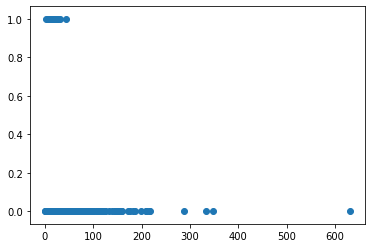

1.0
630.0


In [35]:
df_list1['teste'] = df_list1['acert_100'] * df_list1['subm/quest']
grap1 = df_list1[df_list1['teste']>0]
plt.scatter(grap1['teste'].tolist(), 
            grap1['desistente'].tolist(), 
            marker='o')
plt.show()
print(grap1['teste'].min())
print(grap1['teste'].max())

In [36]:
grap = grap1[grap1['desistente']==1]
#test_ndes = ind[ind['desistente']==0]

teste1 = grap1[grap1['teste']<=grap['teste'].max()]
print(teste1.count().values[0])
#teste1[teste1['desistente']==1]
#teste1

334


In [37]:
df_list1['totalError'] = df_list1['totalError'] / df_list1['total_subm']
df_list1['totalAcert'] = df_list1['totalAcert'] / df_list1['total_subm']
df_list1['acert_100'] = df_list1['acert_100'] / df_list1['total_subm']
df_list1[df_list1['desistente']==1]

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste
49,77335557-c5d1-4144-be6e-84b6114ec22e,d7896ba5-cd34-45b3-b393-aacecc2cf4fa,0.882353,0.117647,0.117647,0,1,17,4,4.250000,7571,8.500000
59,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0d327166-a647-4fa2-8def-1a64f55b223c,0.555556,0.444444,0.444444,0,1,9,4,2.250000,600,9.000000
259,d99923f0-d174-4902-9759-c8220b821d36,9ed18ab4-989f-4905-b26a-84f647688ea2,0.333333,0.666667,0.666667,0,1,6,1,6.000000,1967,24.000000
263,d99923f0-d174-4902-9759-c8220b821d36,af372d9c-963c-4b6f-a750-b43d82636ee3,0.250000,0.750000,0.750000,0,1,4,1,4.000000,164,12.000000
266,d99923f0-d174-4902-9759-c8220b821d36,bf41c066-dbb5-41b1-901b-6bda4ff6f018,0.666667,0.333333,0.333333,0,1,18,5,3.600000,3597,21.600000
282,e9c7c378-eac4-44b2-b687-4dca6d77cd54,051d0f69-c067-4380-adc9-f3155d0d1080,0.866667,0.133333,0.133333,0,1,30,5,6.000000,14994,24.000000
311,e9c7c378-eac4-44b2-b687-4dca6d77cd54,71196707-773f-4fd7-bc3f-90791a014750,0.833333,0.166667,0.000000,0,1,24,4,6.000000,29463,0.000000
327,e9c7c378-eac4-44b2-b687-4dca6d77cd54,98f0248e-90f7-4e31-9b30-be6f4fe11306,0.833333,0.166667,0.166667,0,1,18,2,9.000000,32566,27.000000
331,e9c7c378-eac4-44b2-b687-4dca6d77cd54,a587897b-78d5-429f-98d8-6722ab708b5d,0.750000,0.250000,0.250000,0,1,12,2,6.000000,2343,18.000000
334,e9c7c378-eac4-44b2-b687-4dca6d77cd54,b8080a24-cb60-4c96-8bd1-d1f8f3295686,0.869565,0.130435,0.130435,0,1,23,4,5.750000,7404,17.250000


In [38]:
# t = df_list1[df_list1['totalError']>= 0.55]
# t = t[t['teste']<=27]
# t = t[t['teste']>=8.5]
# t = t[t['totalQuest']<=5]
# t = t[t['subm/quest']<=9]
# t

t = df_list1[df_list1['totalError']>= 0.66]
t = t[t['totalError']<= 0.885]
#    #t = df_list1[df_list1['totalError']>= 0.57]
t = t[t['teste']<=27]
#    #t = t[t['teste']<=7.5]
t = t[t['teste']>=8.5]
t = t[t['totalQuest']<=5]
t = t[t['totalQuest']>=2]
t = t[t['subm/quest']<=6.4]
#    #t = t[t['subm/quest']<=9]
t = t[t['total_subm']>=7]
t = t[t['total_subm']<=30]
t = t[t['timeInSecounds']>=1967]
t = t[t['timeInSecounds']<=14994]
print(t.count().values[0])
t


#podendo ver a quantidade de alunos que pode desistir futuramente
#oberservar quantos, nessa metrica, foram aprovados
#oberservar quais mais podem desistir nessa, quais mais podem desistir nas próximas listas
#oberservar quais mais devem ter cuidados durante o segmento das questoes
#obervar ate quantos % de media de erro por submissao pode haver uma reprovação e quantos % acima desses os alunos erram e seguem
#

58


,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste
30,6d04019e-905c-4d70-810a-a7f1fa34fe22,fbad0b46-40f6-48f9-875a-76c1f47cb437,0.666667,0.333333,0.333333,14,0,12,3,4.000000,6867,16.000000
33,77335557-c5d1-4144-be6e-84b6114ec22e,3b13a996-3002-4250-9b5f-272bdb8c0ee3,0.722222,0.277778,0.277778,5,0,18,5,3.600000,7728,18.000000
35,77335557-c5d1-4144-be6e-84b6114ec22e,4bef788d-6b9f-461e-a16f-1db70e913493,0.739130,0.260870,0.217391,13,0,23,5,4.600000,13903,23.000000
39,77335557-c5d1-4144-be6e-84b6114ec22e,6fe4ded9-cf7e-44de-bb1f-e8f5244545df,0.722222,0.277778,0.277778,14,0,18,5,3.600000,5434,18.000000
49,77335557-c5d1-4144-be6e-84b6114ec22e,d7896ba5-cd34-45b3-b393-aacecc2cf4fa,0.882353,0.117647,0.117647,0,1,17,4,4.250000,7571,8.500000
52,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,00ef5626-f029-49e8-aa27-1839357a55c0,0.814815,0.185185,0.185185,1,0,27,5,5.400000,7186,27.000000
81,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,43dd8e83-481a-4abb-9773-f759d482affd,0.807692,0.192308,0.192308,15,0,26,5,5.200000,8639,26.000000
85,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,55c3cbad-e6e2-4c79-88e9-b03c0416c515,0.760000,0.240000,0.200000,15,0,25,5,5.000000,10659,25.000000
107,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8b8abf76-bef9-4d7f-a0e8-afead692300e,0.807692,0.192308,0.192308,15,0,26,5,5.200000,4651,26.000000
109,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,914d610d-8727-4320-bc19-47a0883dfea2,0.666667,0.333333,0.333333,15,0,18,5,3.600000,5562,21.600000


In [39]:
t.groupby(['ateLista'])['user_id'].count()

ateLista
0      7
1      1
2      2
3      1
5      2
6      3
7      1
8      1
9      2
11     3
12     3
13     1
14     6
15    25
Name: user_id, dtype: int64

In [40]:
nt = df_list1[df_list1['acert_100']>= 0.117]
nt['teste'] = nt['teste'] * nt['acert_100']
nt[nt['desistente']==1]

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste
49,77335557-c5d1-4144-be6e-84b6114ec22e,d7896ba5-cd34-45b3-b393-aacecc2cf4fa,0.882353,0.117647,0.117647,0,1,17,4,4.250000,7571,1.000000
59,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0d327166-a647-4fa2-8def-1a64f55b223c,0.555556,0.444444,0.444444,0,1,9,4,2.250000,600,4.000000
259,d99923f0-d174-4902-9759-c8220b821d36,9ed18ab4-989f-4905-b26a-84f647688ea2,0.333333,0.666667,0.666667,0,1,6,1,6.000000,1967,16.000000
263,d99923f0-d174-4902-9759-c8220b821d36,af372d9c-963c-4b6f-a750-b43d82636ee3,0.250000,0.750000,0.750000,0,1,4,1,4.000000,164,9.000000
266,d99923f0-d174-4902-9759-c8220b821d36,bf41c066-dbb5-41b1-901b-6bda4ff6f018,0.666667,0.333333,0.333333,0,1,18,5,3.600000,3597,7.200000
282,e9c7c378-eac4-44b2-b687-4dca6d77cd54,051d0f69-c067-4380-adc9-f3155d0d1080,0.866667,0.133333,0.133333,0,1,30,5,6.000000,14994,3.200000
327,e9c7c378-eac4-44b2-b687-4dca6d77cd54,98f0248e-90f7-4e31-9b30-be6f4fe11306,0.833333,0.166667,0.166667,0,1,18,2,9.000000,32566,4.500000
331,e9c7c378-eac4-44b2-b687-4dca6d77cd54,a587897b-78d5-429f-98d8-6722ab708b5d,0.750000,0.250000,0.250000,0,1,12,2,6.000000,2343,4.500000
334,e9c7c378-eac4-44b2-b687-4dca6d77cd54,b8080a24-cb60-4c96-8bd1-d1f8f3295686,0.869565,0.130435,0.130435,0,1,23,4,5.750000,7404,2.250000
337,e9c7c378-eac4-44b2-b687-4dca6d77cd54,c7117c4e-ab12-427b-ab67-6af761fe7656,0.666667,0.333333,0.333333,0,1,9,3,3.000000,10273,3.000000


In [41]:
nt = nt[nt['acert_100']<= 0.3572]
nt = nt[nt['acert_100']>= 0.117]
#    #t = df_list1[df_list1['totalError']>= 0.57]
nt = nt[nt['teste']<=7.2]
#    #t = t[t['teste']<=7.5]
nt = nt[nt['teste']>=1]
nt = nt[nt['totalQuest']<=5]
nt = nt[nt['totalQuest']>=2]
nt = nt[nt['subm/quest']<=6]
nt = nt[nt['subm/quest']>=2.25]
#    #t = t[t['subm/quest']<=9]
nt = nt[nt['total_subm']>=9]
nt = nt[nt['total_subm']<=24]
nt = nt[nt['timeInSecounds']>=2343]
nt = nt[nt['timeInSecounds']<=14175]
print(nt.count().values[0])
nt

57


,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,teste
30,6d04019e-905c-4d70-810a-a7f1fa34fe22,fbad0b46-40f6-48f9-875a-76c1f47cb437,0.666667,0.333333,0.333333,14,0,12,3,4.000000,6867,5.333333
33,77335557-c5d1-4144-be6e-84b6114ec22e,3b13a996-3002-4250-9b5f-272bdb8c0ee3,0.722222,0.277778,0.277778,5,0,18,5,3.600000,7728,5.000000
35,77335557-c5d1-4144-be6e-84b6114ec22e,4bef788d-6b9f-461e-a16f-1db70e913493,0.739130,0.260870,0.217391,13,0,23,5,4.600000,13903,5.000000
39,77335557-c5d1-4144-be6e-84b6114ec22e,6fe4ded9-cf7e-44de-bb1f-e8f5244545df,0.722222,0.277778,0.277778,14,0,18,5,3.600000,5434,5.000000
49,77335557-c5d1-4144-be6e-84b6114ec22e,d7896ba5-cd34-45b3-b393-aacecc2cf4fa,0.882353,0.117647,0.117647,0,1,17,4,4.250000,7571,1.000000
109,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,914d610d-8727-4320-bc19-47a0883dfea2,0.666667,0.333333,0.333333,15,0,18,5,3.600000,5562,7.200000
113,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,9fd9e9db-c163-4c65-b216-2e227c7fa1c3,0.588235,0.411765,0.352941,15,0,17,5,3.400000,10602,7.200000
115,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,a90ff56d-c000-4bc5-9078-ee23c8f74c90,0.684211,0.315789,0.315789,15,0,19,5,3.800000,2537,7.200000
118,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,aea89293-579b-4e7a-b756-af41468477b8,0.705882,0.294118,0.294118,15,0,17,5,3.400000,3056,5.000000
119,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,b9240348-c223-4c0d-b75f-09c522952143,0.736842,0.263158,0.263158,15,0,19,5,3.800000,10305,5.000000


In [42]:
nt.groupby(['ateLista'])['user_id'].count()

ateLista
0      7
2      2
3      1
5      2
6      2
7      1
8      1
9      2
11     3
12     4
13     2
14     7
15    23
Name: user_id, dtype: int64

In [43]:
df_class_lop_t['timeInSecounds'] = df_class_lop_t['timeConsuming'].divide(1000).astype(int)
df_without_duplicates = df_class_lop_t[df_class_lop_t["timeInSecounds"] > 0].drop(['language','test_id','environment','timeConsuming','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)

a = df_without_duplicates.columns.tolist()
list2 = pd.DataFrame(columns = a)

for i in range(alunoPclass.count().values[0]):
    one_class = df_without_duplicates[df_without_duplicates['class_id']==classes[i]]
    order_lists1 = order_lists[order_lists['class_id']==classes[i]]
    order_lists1 = order_lists1['listQuestions_id'].tolist()
    order_lists1 = order_lists1[1]
    listeste = one_class[one_class['listQuestions_id']==order_lists1]
    list2 = list2.append(listeste, ignore_index=True)
list2['user_id'].drop_duplicates()

0        337cb03d-871a-4e38-8ab1-f79f8a0d8807
26       105d68c3-d07d-4cc4-a706-f46d46c5101a
38       5be55095-0c45-48aa-a75d-b023d9e4191f
56       7a076e15-2eeb-47dd-b9b3-cdb8c2993f04
72       d084a24c-f65b-4a20-99fe-6a1154b36105
                         ...                 
15396    1e3d1ca6-db5d-4346-b26c-909b5e96a8f0
15462    5390df8c-82f1-48c1-9967-963411a5625b
15463    8736e442-e477-47b6-95d7-9b2ee6821112
15678    f9291106-ff79-4406-b4ed-39117e714473
15732    18bb274f-5134-4d4a-83b1-14bb46cc071b
Name: user_id, Length: 442, dtype: object

In [44]:
des_aqui = des.copy()

tlist2 = list1.copy()
tlist2 = tlist2.append(list2)
tlist2 = tlist2.reset_index()

a = des_aqui[ des_aqui['ateLista'] < 1]
indexNames = []
for i in a.values:
    b = tlist2[tlist2['user_id'] == i[0]].index
    for x in b:
        indexNames.append(x)
tlist2 = tlist2.drop(tlist2.index[indexNames])

for a in range(des_aqui.count().values[0]):
    if des_aqui['ateLista'].values[a]<2:
        des_aqui['desistente'][a]=1
    else:
        des_aqui['desistente'][a]=0
        
a = des[ des['ateLista'] < 1]
indexNames = []
for i in a.values:
    b = des_aqui[des_aqui['user_id'] == i[0]].index
    for x in b:
        indexNames.append(x)
des_aqui = des_aqui.drop(des_aqui.index[indexNames])

list2 = tlist2.copy()

df_erro = list2[list2["hitPercentage"] == 0]
df_erro = df_erro.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['class_id','user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = list2[list2["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['class_id','user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = list2[list2["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['class_id','user_id'])['acert_100'].sum()

df_cont_subm = list2.groupby(['class_id','user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['class_id','user_id'])['total_subm'].sum()

a = list2.drop(['_id', 'hitPercentage', 'listQuestions_id','createdAt', 'timeInSecounds'], axis=1)
a = a.drop('index', axis=1)
a = a.drop_duplicates()
qtd_qPa = a.groupby(['class_id','user_id'])['question_id'].count().reset_index(name='totalQuest')

media_list1 = pd.merge(df_cont_subm, qtd_qPa, on=['class_id','user_id'])
media_list1['subm/quest'] = media_list1['total_subm'] / media_list1['totalQuest']

tempott = list2.groupby(['class_id','user_id'])['timeInSecounds'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df_list2 = pd.merge(df_erro, df_acerto, on=['class_id','user_id'], how='outer')
df_list2 = pd.merge(df_list2, df_100, on=['class_id','user_id'], how='outer')
df_list2.replace(np.NaN, 0, inplace = True)
df_list2 = pd.merge(df_list2, des_aqui, on=['class_id','user_id'])
df_list2 = pd.merge(df_list2, media_list1, on=['class_id','user_id'])
df_list2 = pd.merge(df_list2, tempott, on=['class_id','user_id'])
#des_aqui[des_aqui['desistente']==1]
#print(des_aqui[des_aqui['desistente']==1].count().values[0])
df_list2

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds
0,6d04019e-905c-4d70-810a-a7f1fa34fe22,0637719e-7c30-4c82-9f2e-6e96fd0aa950,1.0,21.0,21.0,14,0,22,19,1.157895,1718
1,6d04019e-905c-4d70-810a-a7f1fa34fe22,07376946-2f27-4f6a-ac48-500c14d9ea02,21.0,15.0,13.0,13,0,36,14,2.571429,6758
2,6d04019e-905c-4d70-810a-a7f1fa34fe22,0ab26d02-feb0-4c7e-9d3b-56f600b80118,54.0,54.0,28.0,15,0,108,19,5.684211,68726
3,6d04019e-905c-4d70-810a-a7f1fa34fe22,10a7114c-acfa-4168-9c7b-5f0ade3e35b0,88.0,35.0,23.0,13,0,123,19,6.473684,77786
4,6d04019e-905c-4d70-810a-a7f1fa34fe22,1634bece-b1d5-4ed2-8946-d61272e4e25c,61.0,24.0,13.0,15,0,85,13,6.538462,74527
...,...,...,...,...,...,...,...,...,...,...,...
450,8f055c33-00ad-4284-aec8-da401901e795,f1d371cf-c64a-4c51-a00b-93f92b4415be,0.0,1.0,1.0,12,0,1,1,1.000000,3950
451,e9c7c378-eac4-44b2-b687-4dca6d77cd54,15d784e4-c6ac-45d5-b24d-f937b5084a3d,0.0,15.0,15.0,14,0,15,15,1.000000,155
452,e9c7c378-eac4-44b2-b687-4dca6d77cd54,2a73ec25-121a-4a58-9612-f3613c0a38c7,0.0,15.0,15.0,13,0,15,15,1.000000,224
453,e9c7c378-eac4-44b2-b687-4dca6d77cd54,38df28f4-b883-4fb4-a4f6-97b7d0098dc4,0.0,15.0,15.0,14,0,15,15,1.000000,315


In [45]:
df_list2['percTotalError'] = df_list2['totalError'] / df_list2['total_subm']
df_list2['percTotalAcert'] = df_list2['totalAcert'] / df_list2['total_subm']
df_list2['percAcert_100'] = df_list2['acert_100'] / df_list2['total_subm']
df_list2[df_list2['desistente']==1]

,class_id,user_id,totalError,totalAcert,acert_100,ateLista,desistente,total_subm,totalQuest,subm/quest,timeInSecounds,percTotalError,percTotalAcert,percAcert_100
36,77335557-c5d1-4144-be6e-84b6114ec22e,2c9e215b-9cf1-4980-9d52-f52f3e5bd653,53.0,4.0,4.0,1,1,57,6,9.500000,38501,0.929825,0.070175,0.070175
55,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,00ef5626-f029-49e8-aa27-1839357a55c0,47.0,16.0,16.0,1,1,63,15,4.200000,12793,0.746032,0.253968,0.253968
163,8f055c33-00ad-4284-aec8-da401901e795,332de15f-bd1b-4eb9-9bc0-c4a8f5c16442,11.0,8.0,8.0,1,1,19,8,2.375000,7584,0.578947,0.421053,0.421053
186,8f055c33-00ad-4284-aec8-da401901e795,8102a5b3-008c-4676-a856-06cce601a032,2.0,13.0,13.0,1,1,15,12,1.250000,1172,0.133333,0.866667,0.866667
188,8f055c33-00ad-4284-aec8-da401901e795,8685c250-e7f0-4a04-8507-83ec580852c2,34.0,7.0,7.0,1,1,41,10,4.100000,18501,0.829268,0.170732,0.170732
237,d99923f0-d174-4902-9759-c8220b821d36,08e94826-91a0-4941-bbd0-3c5e6675e3d6,36.0,4.0,4.0,1,1,40,5,8.000000,23989,0.900000,0.100000,0.100000
266,d99923f0-d174-4902-9759-c8220b821d36,9c134144-9218-474b-a55b-c03525e24417,30.0,12.0,11.0,1,1,42,9,4.666667,24276,0.714286,0.285714,0.261905
325,e9c7c378-eac4-44b2-b687-4dca6d77cd54,91932d11-d4c3-4d30-9be8-cd63e956833e,60.0,28.0,28.0,1,1,88,12,7.333333,42351,0.681818,0.318182,0.318182
338,e9c7c378-eac4-44b2-b687-4dca6d77cd54,cb17f707-45d7-40f2-869f-cc5d3d763ff4,74.0,38.0,27.0,1,1,112,11,10.181818,178883,0.660714,0.339286,0.241071
342,e9c7c378-eac4-44b2-b687-4dca6d77cd54,de8db711-4ded-4c55-9ed2-050e88200427,117.0,22.0,14.0,1,1,139,14,9.928571,399274,0.841727,0.158273,0.100719


In [46]:
y_desist = df_list2['desistente'].tolist()
x_dados = df_list2.drop(['class_id', 'user_id', 'desistente', 'ateLista'], axis=1)
x_dados = x_dados.values
x_dados.shape

(455, 10)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_dados, y_desist, test_size=0.3, shuffle=True, random_state=123)

In [48]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [49]:
y_test_pred = dt_model.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9562043795620438

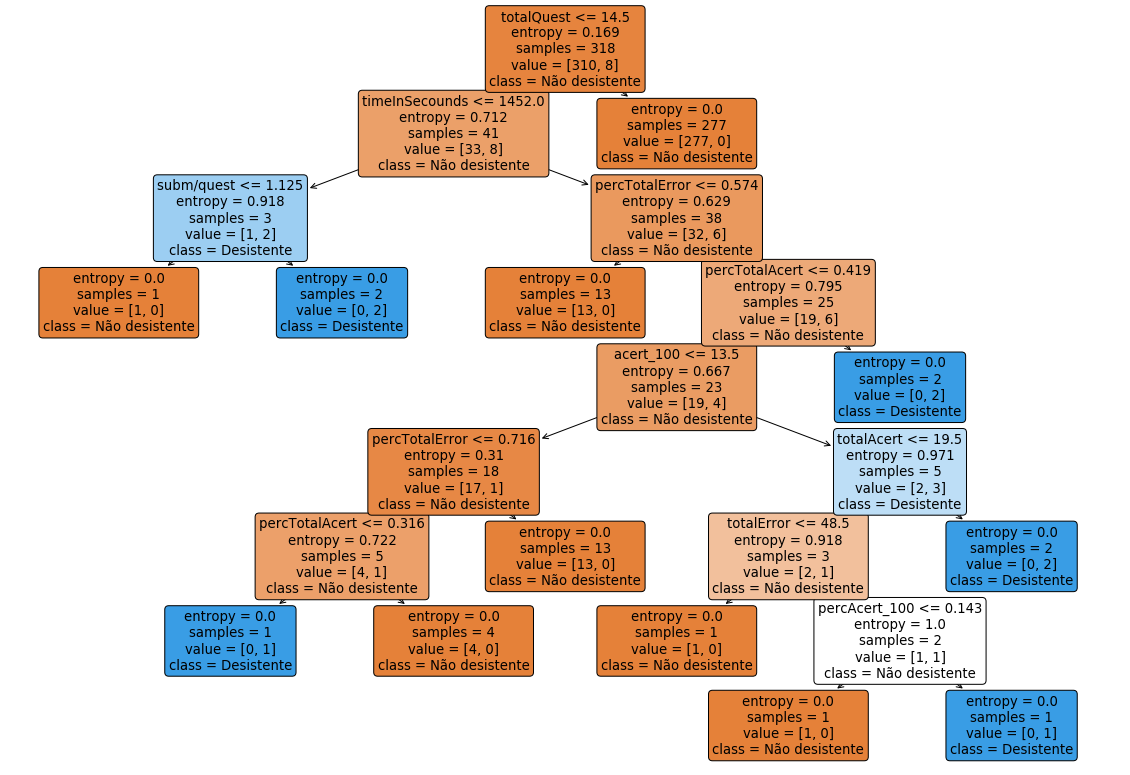

In [50]:
bx = df_list2.drop(['class_id', 'user_id', 'desistente', 'ateLista'], axis=1)
bx = bx.columns.tolist()

plt.figure(figsize=(20, 14))

plot_tree(dt_model, filled=True, rounded=True,class_names=['Não desistente','Desistente',],feature_names=bx)

plt.show()